# Описание проекта

- Для интернет-магазина, который продаёт по всему миру компьютерные игры, необходимо спланировать закупки на следующий год (2017 г.) и разработать рекламные кампании.
- Проанализируем доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
- Выявим определяющие успешность игры закономерности.
- Отчет и прогнозы будут переданы в отдел маркетинга для дальнейших действий.

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Данные за 2016 год могут быть неполными.**

## Откроем файл с данными и посмотрим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Вывод:** В первых 10 строках уже немало пропусков - не очень хороший знак.  
Посмотрим общую информацию о датафрейме:

### Общая информация о датафрейме.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** Пропусков много. Посмотрим их подробнее чуть ниже.

### В каких столбцах меняем типы данных.

- user_score - это же численный показатель, а имеет тип object - меняем на 'float'.
- year_of_release - меняем на 'int'.

### Информация о пропусках, методы их заполнения.

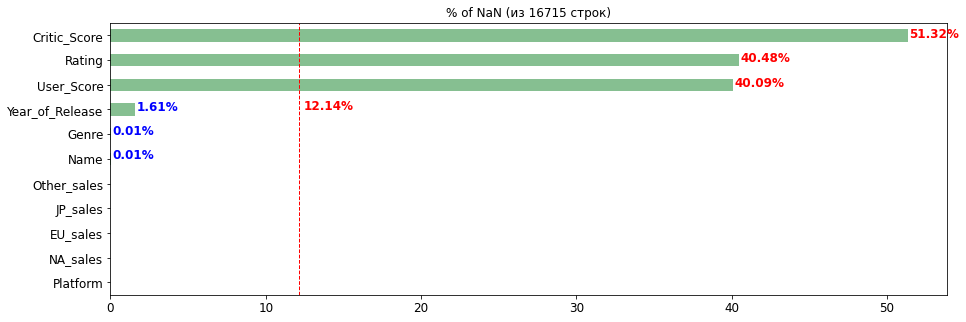

In [5]:
def percent_hbar(games, old_threshold=None):
    percent_of_nulls = (games.isnull().sum()/len(games)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(15, 5), title='% of NaN (из {} строк)'.format(len(games)), 
                               color='#86bf91', legend=False, fontsize=12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold

plot, threshold = percent_hbar(games)

In [6]:
games.query('Critic_Score.isnull() & Rating.isnull() & User_Score.isnull()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Вывод:** Количество пропусков не зависит от года выпуска игры.

### **Вывод:**  
- Практически половина данных отсутствует по столбцам Critic_Score, Rating и User_Score. Такая важная описательная характеристика данных как среднее значение количества пропусков в столбце равна **12,14%.**

## Подготовка данных


### Для удобства работы приведем названия столбцов к нижнему регистру:

In [7]:
games.columns = games.columns.str.lower()

### Изменение типа данных по столбцам user_score и year_of_release.

In [8]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Почитав FAQ Metacritic'a, найдем, что это аббревиатура от **To Be Determined.** Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Предполагаю, что с таким можно столкнуться, когда анализируешь или малопопулярные игры, или игры, имеющие приоисхождение и, соответственно, аудиторию, большая часть игроков которых не разговаривает по-английски и не оставляет свои отзывы на таких мировых сайтах как Metacritic.

Но числовой тип столбца нам необходим. Т.к. 'tbd' фактически и является NaN, заменим и NaN, и 'tbd' на значение -1 и приведем значение столбца к числовому значению.

In [11]:
games.drop(games[games['year_of_release'].isnull()].index, inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year

### Обработка пропусков:

У нас к обработке столбцы **critic_score** и **user_score** - заполним пропуски значением -1.  
А столбец **rating** - заполним пропуски значением out of rating.

In [12]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games['rating'] = games['rating'].fillna('out of rating')

In [13]:
display('Количество пропусков в столбце critic_score - {}'.format(games['critic_score'].isnull().sum()))
display('Количество пропусков в столбце user_score - {}'.format(games['user_score'].isnull().sum()))
display('Количество пропусков в столбце rating - {}'.format(games['rating'].isnull().sum()))
display('Количество пропусков в столбце year_of_release - {}'.format(games['year_of_release'].isnull().sum()))

'Количество пропусков в столбце critic_score - 0'

'Количество пропусков в столбце user_score - 0'

'Количество пропусков в столбце rating - 0'

'Количество пропусков в столбце year_of_release - 0'

### Отдельный столбец с суммой продаж по всем регионам 'total_sales':

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [15]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,out of rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,out of rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,out of rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,out of rating,28.31


### **Вывод:**  
- При подготовке данных к анализу были заполненны пропуски, заменено значение TBD на Nan в колонке 'user_score', во всех клонках установлен правильный тип данных, также были посчитаны суммарные мировые продажи.

In [16]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' '¡Shin Chan Flipa en colores!' nan]
name : кол-во

## Исследовательский анализ данных

### Количество выпущенных игр по годам.

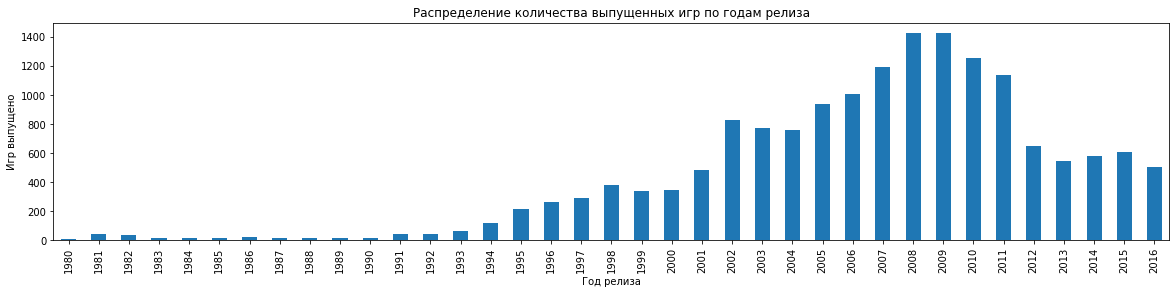

In [17]:
games.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(20,4))
sns.set()
sns.set_palette('Set2')
plt.title('Распределение количества выпущенных игр по годам релиза')
plt.ylabel('Игр выпущено')
plt.xlabel('Год релиза')
plt.show()

**Вывод:** До 1994 года игр практически не было, затем началось развитие индустрии игр благодаря MS-DOS и Windows. Резкий скачек пришел на 2002 год, а пик прошел с 2008 по 2009 год. Далее идет спад, так как начинаются развиваться мобильные игры, социальные сети и мессенджеры. Но для прогноза на 2017 год, нам нужен период с 2012 года по 2016 год. (5 лет)

### Количество выпущенных игр по платформам.

Посмотрим, как меняется количество выпущенных игр в зависимости от платформы:

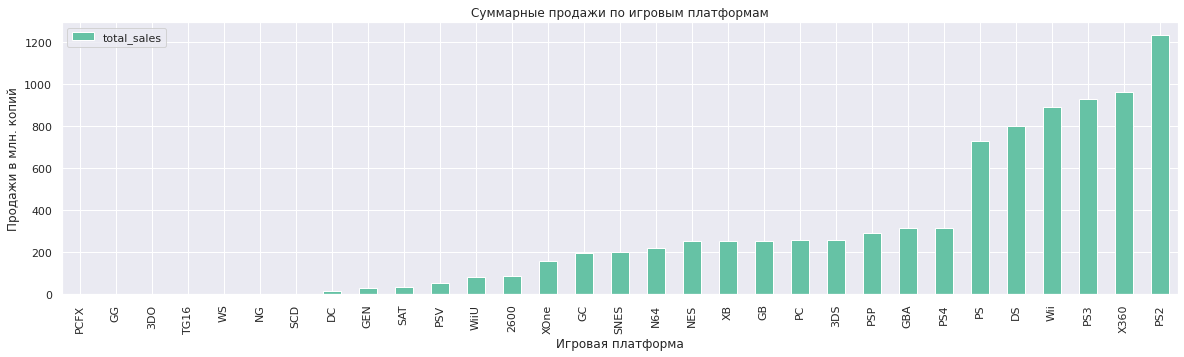

In [18]:
platform_pivot = (games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales'))
sns.set()
sns.set_palette('Set2')
platform_pivot.plot(kind='bar', figsize=(20,5))
plt.title('Суммарные продажи по игровым платформам')
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Игровая платформа')
plt.show()

**Вывод:** Лидером среди всех платформ стала PS2.  
В топ-5 входят: 
- PS2
- X360
- PS3
- Wii
- DS  

Самые редкие платформы - представители японских технологий.

In [19]:
platforms = platform_pivot.sort_values(by='total_sales', ascending=False)[0:6].index
games_platforms = games.query('platform in @platforms')
games_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,-1.0,-1.0,out of rating,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-1.0,-1.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,out of rating,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,out of rating,0.01


Построим распределением продаж по платформам по годам, для этого создадим функцию.

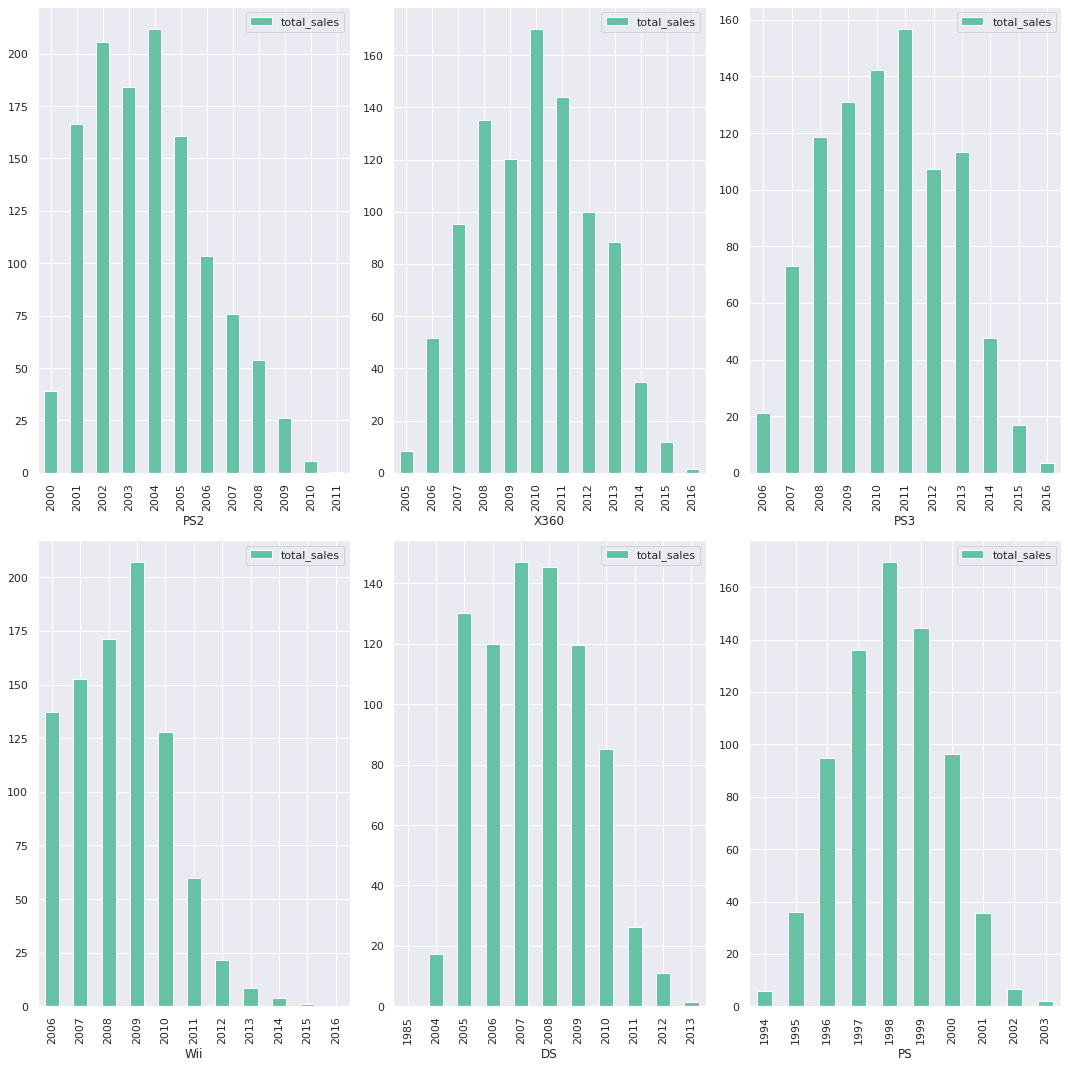

In [20]:
def platform_sales(games, my_list,n,m, ysize):
    temp = games.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    plt.subplots(n,m,figsize=(15,ysize))
    i = 1
    for platform in my_list:
        ax = plt.subplot(n,m,i)
        l = list(temp.query('platform==@platform').index.get_level_values(1))
        temp.query('platform==@platform').plot(kind='bar', ax=ax, label=platform)
        plt.legend()
        plt.xlabel(platform)
        i+=1
        ax.set_xticklabels(l)
    plt.tight_layout()
platform_sales(games_platforms, platforms,2,3,15)

Как видим из графиков, выделяется только Wii, которая резко стартовала и потом также быстро упала. Другие платформы постепенно повышали продажи, достигали своего пика и потом начинали угасать. Примерным промежутком времени в который появляются новые плафтормы и исчезают старые можно назвать 10 лет.

In [21]:
games_period = games.query('2012 <= year_of_release <= 2016')
games_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

Для анализа выделим последние 5 лет.

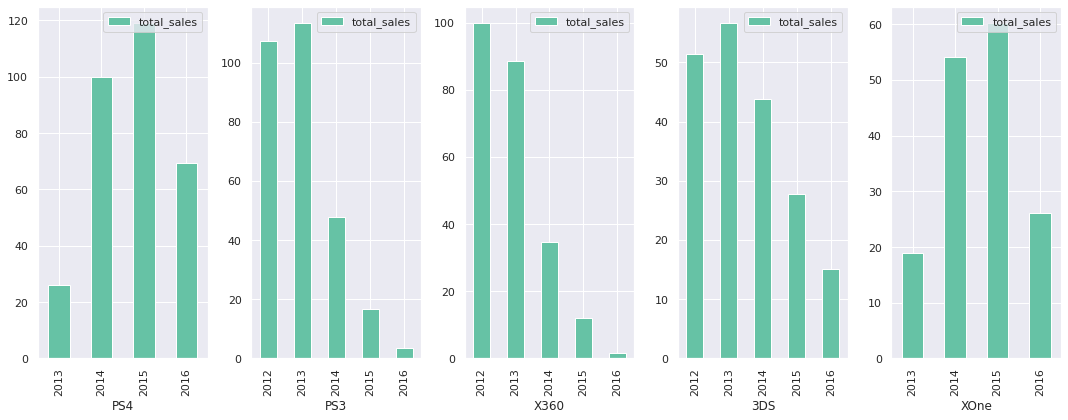

In [22]:
top_platforms = games_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[0:5]
games_top5_platforms = games_period.query('platform in @top_platforms')
platform_sales(games_top5_platforms, top_platforms, 1, 5, 6)

Для анализа выделим топ-5 платформ.  
Даже продажи самыъ прибыльных платформ падают, мы можем спрогнозировать, что в 2017 году потециально прибыльными могут стать: PS4, 3DS и XOne.  

### Продажи топ-10 самых продаваемых игр.

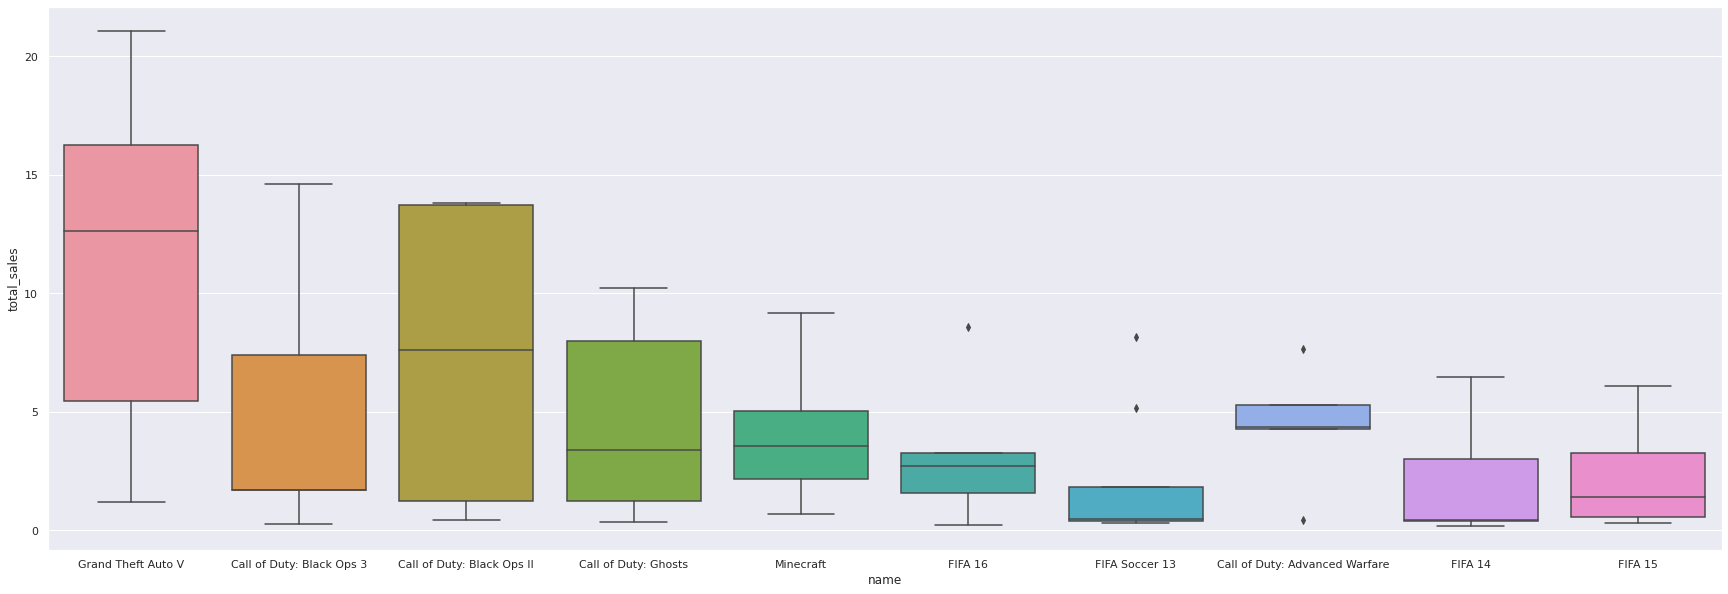

In [23]:
top10_games = games_period.groupby('name')['total_sales'].sum().sort_values(ascending=False)[0:10]
plt.figure(figsize=(30,10))
sns.boxplot(data=games_period.query('name in @top10_games.index'), x='name', y='total_sales')
plt.show()

Посмотрим как распределены продажи этих игр по платформам.

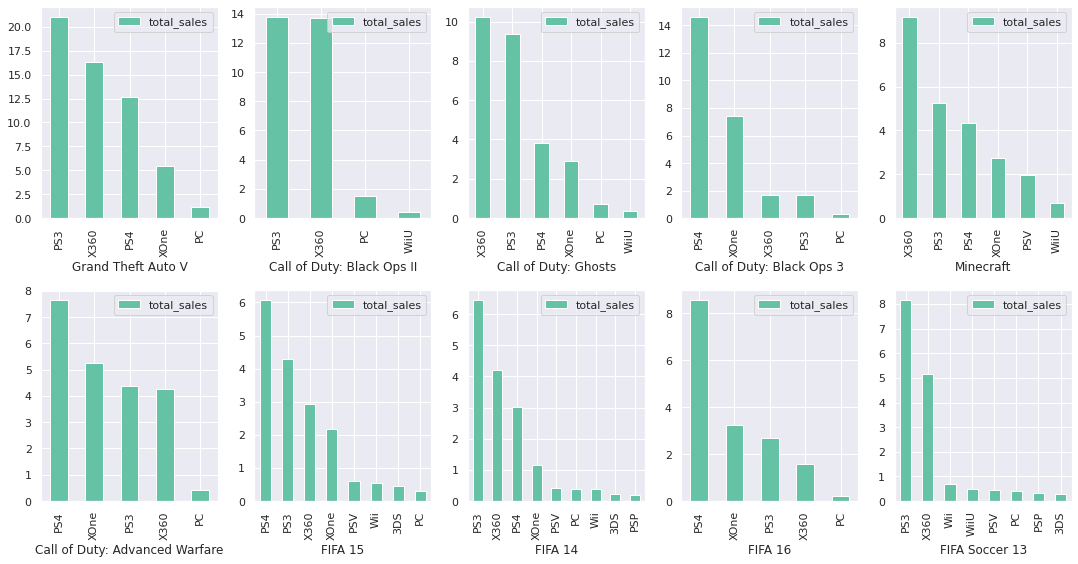

In [24]:
plt.subplots(2,5,figsize=(15,8))
i = 1
for game in top10_games.index:
    ax=plt.subplot(2,5,i)
    games_period.query('name==@game').plot(kind='bar', x='platform', y='total_sales', ax=ax)
    ax.set_xlabel(game)
    i += 1
plt.tight_layout()

**Вывод:** Судя по графикам популярные игры имеют продажи на одинаковых платформах.

### Теперь посмотрим на глобальные продажи игр по платформам.

In [25]:
def create_any_sales_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = games.boxplot(column='total_sales', fontsize=20, figsize=(30,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = games.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='total_sales', by=by_column, fontsize=20, figsize=(30,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

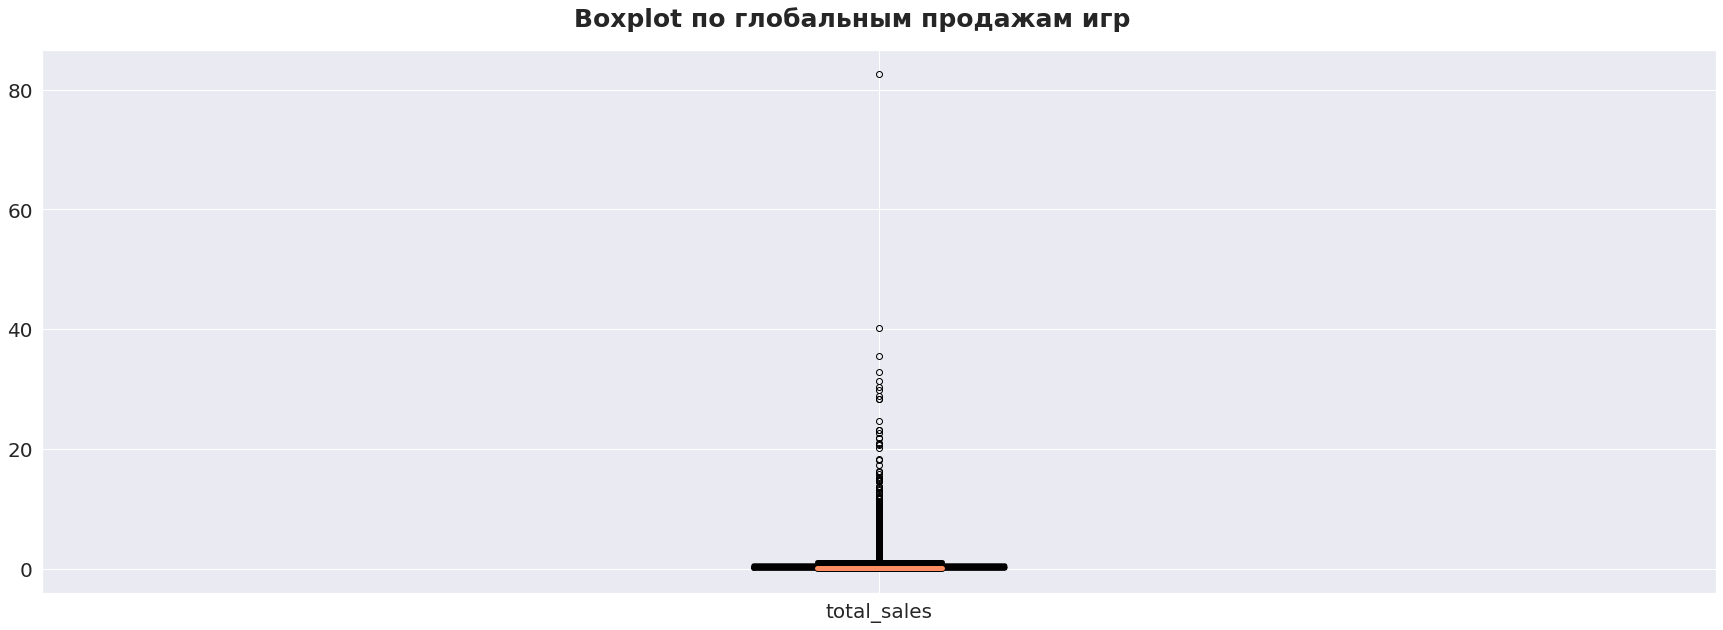

In [26]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр')

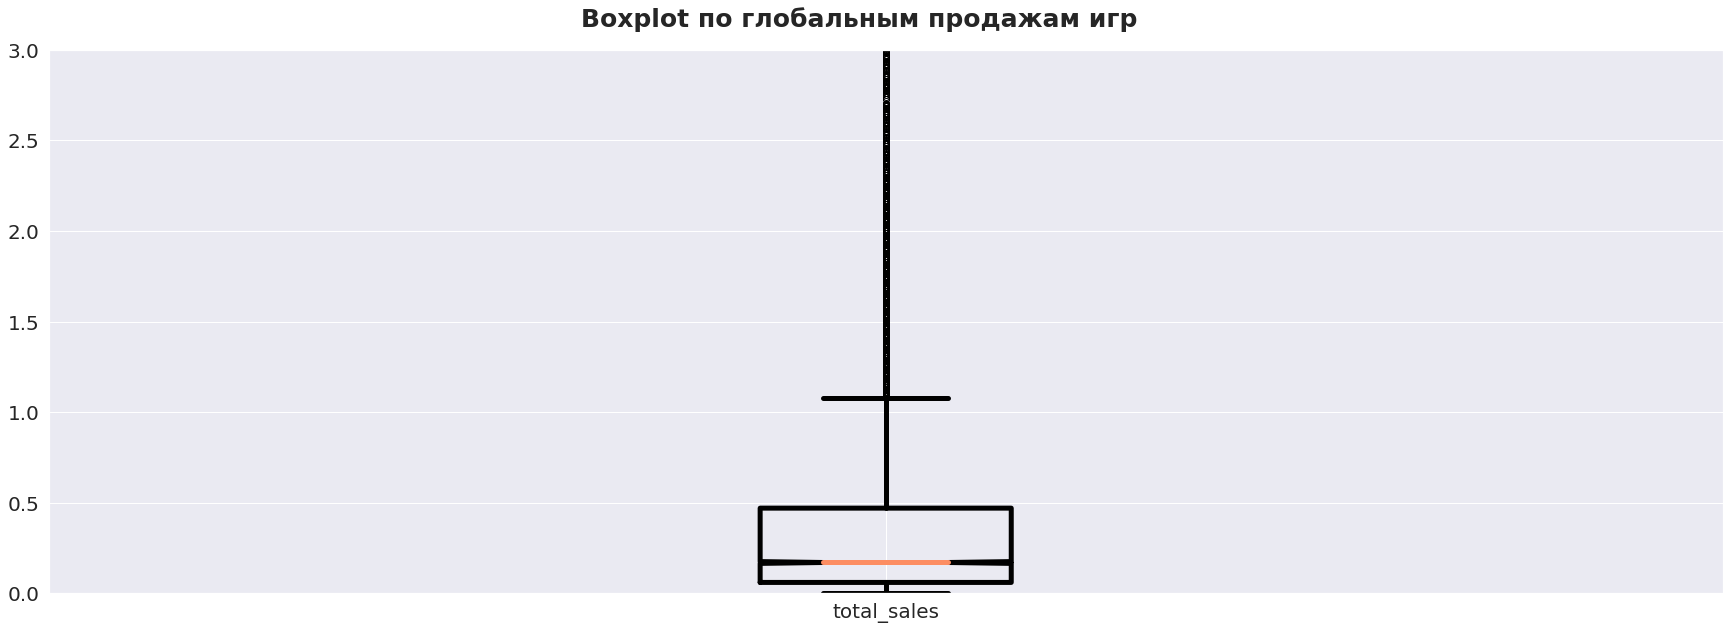

In [27]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр', ylims=[0,3])

**Вывод:** В среднем, продажи игр составляют до 1,2 млн долларов. Медиана - 0,2 миллиона долларов. Не сказать, что это много.

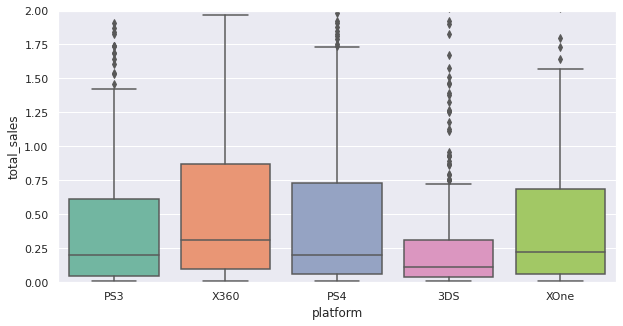

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(data=games_top5_platforms, x='platform', y='total_sales')
plt.ylim(0,2)
plt.show()

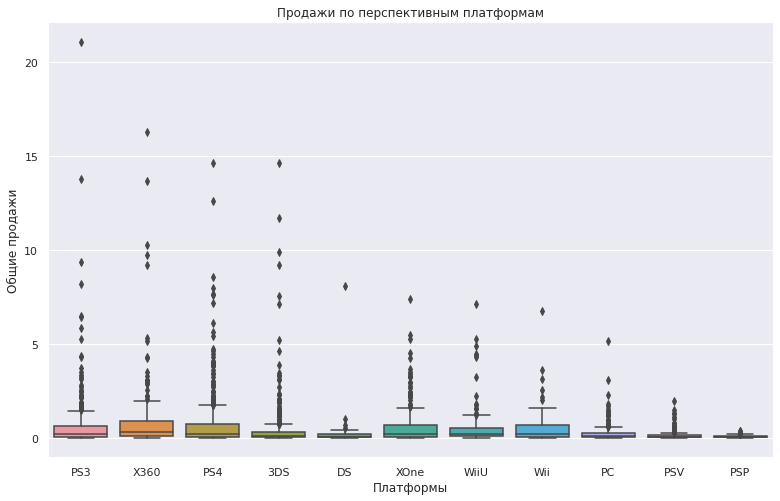

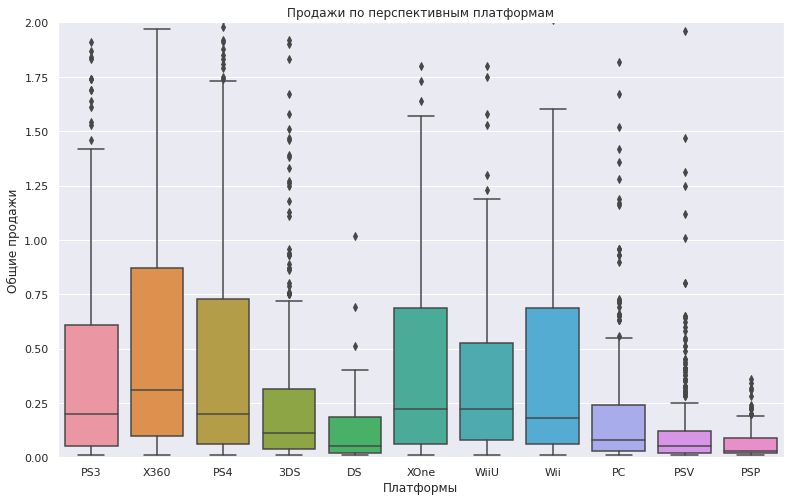

In [29]:
# Комментарий ревьюера 2
import seaborn as sns
data_temp, y = games_period, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

**Вывод:** Медиана по топ-5 платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у 3 платформ - PS4, X360 и Xone - от 1,6 до 2 млн долларов.
У остальных - от 0,6 до 1,4 миллионов долларов.
Среди всех выделяется 3DS - у него эти показатели сильное ниже. Медиана < 0,1 миллиона долларов, верхняя граница - 0,6 млн.

### Посмотрим, как влияют на продажи внутри одной популярной платформы(для исследования берем PS4) отзывы пользователей и критиков

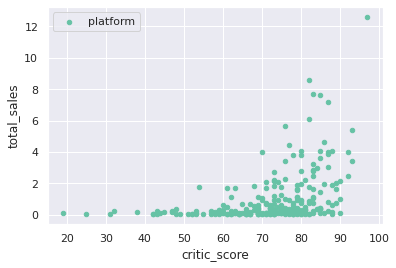

In [30]:
# Комментарий ревьюера 4
# Исправленный код
games_ps4 = games_period[(games_period['platform'] == 'PS4') & (games_period['critic_score'] > 0)].copy()
games_ps4.query('platform=="PS4"').plot(kind='scatter', x='critic_score', y='total_sales', label='platform')
plt.show()

In [31]:
games_ps4.query('platform=="PS4"')['critic_score'].corr(games_ps4.query('platform=="PS4"')['total_sales'])

0.40656790206178095

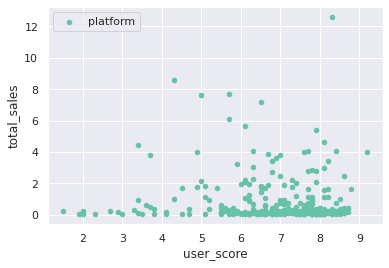

In [32]:
# Комментарий ревьюера 4
games_ps4 = games_period[(games_period['platform'] == 'PS4') & (games_period['user_score'] > 0)].copy()
#games_ps4.query('platform=="PS4"').plot(kind='scatter', x='user_score', y='total_sales', label=platform)
games_ps4.query('platform=="PS4"').plot(kind='scatter', x='user_score', y='total_sales', label='platform')
plt.show()

<font color='DarkBlue'><b>Комментарий студента</b></font><br>
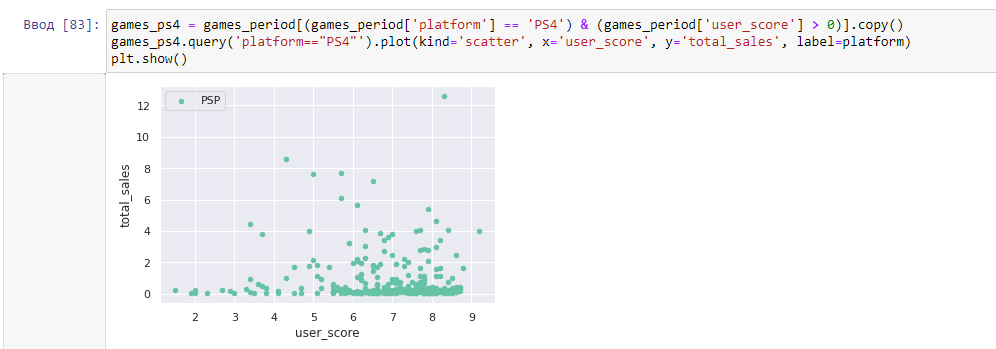

In [33]:
games_ps4.query('platform=="PS4"')['user_score'].corr(games_ps4.query('platform=="PS4"')['total_sales'])

-0.031957110204556376

**Вывод:** По диаграммам рассеяния и коэффициентам корреляции Пирсона видим, что есть слабая положительная зависимость продаж от оценки критиков. От оценки пользователей зависимости нет.  
Выбросов больше в столбце **'user_score'** - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги. В пример могу привести те же последние игры серии Fifa от EA Sports, когда все покупают игру, принося разработчикам прибыль, а потом расстраиваются, увидев, какая эта игра, и ставят ей довольное средние оценки.

In [34]:
platforms = games_period['platform'].unique()
for platform in platforms:
    temp = games_period[(games_period['platform'] == platform) & (games_period['critic_score'] > 0)].copy()
    print(platform,'коэффициент корреляции:',temp['critic_score'].corr(temp['total_sales']))

PS3 коэффициент корреляции: 0.3314972592629587
X360 коэффициент корреляции: 0.3605734888507336
PS4 коэффициент корреляции: 0.40656790206178095
3DS коэффициент корреляции: 0.3208028695360785
DS коэффициент корреляции: nan
XOne коэффициент корреляции: 0.4169983280084017
WiiU коэффициент корреляции: 0.34837976012017485
Wii коэффициент корреляции: -0.4243413011077494
PC коэффициент корреляции: 0.23724324311567915
PSV коэффициент корреляции: 0.0944878992931617
PSP коэффициент корреляции: nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [35]:
platforms = games_period['platform'].unique()
for platform in platforms:
    temp = games_period[(games_period['platform'] == platform) & (games_period['user_score'] > 0)].copy()
    print(platform,'коэффициент корреляции:',temp['user_score'].corr(temp['total_sales']))

PS3 коэффициент корреляции: -0.005143522887113828
X360 коэффициент корреляции: 0.006163978646213326
PS4 коэффициент корреляции: -0.031957110204556376
3DS коэффициент корреляции: 0.19758263411038599
DS коэффициент корреляции: 0.88270872757644
XOne коэффициент корреляции: -0.06892505328279414
WiiU коэффициент корреляции: 0.4002190202148617
Wii коэффициент корреляции: 0.29619680007479526
PC коэффициент корреляции: -0.12186747630735577
PSV коэффициент корреляции: -0.004339437514314869
PSP коэффициент корреляции: -0.802302061939321


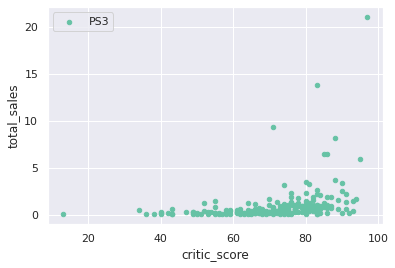

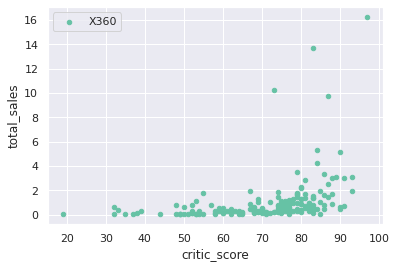

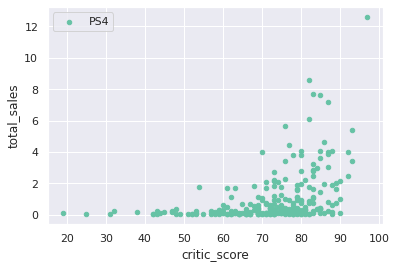

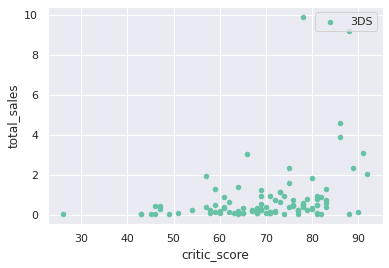

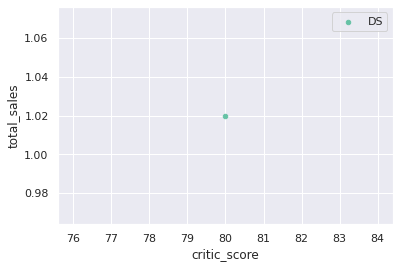

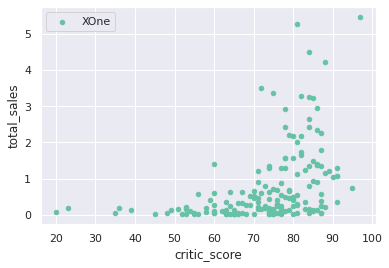

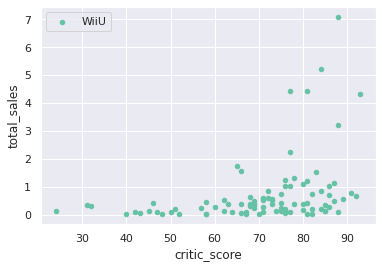

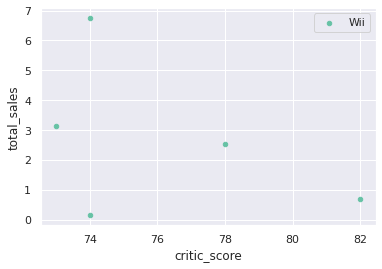

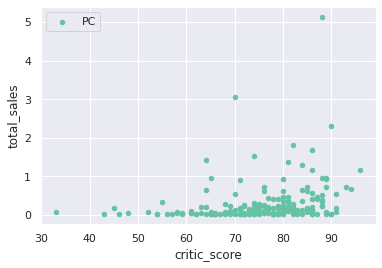

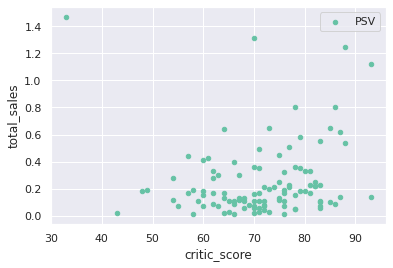

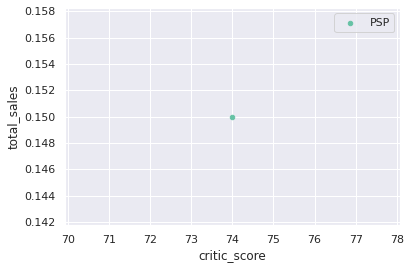

In [36]:
platforms = games_period['platform'].unique()
for platform in platforms:
    temp = games_period[(games_period['platform'] == platform) & (games_period['critic_score'] > 0)].copy()
    temp.plot(x='critic_score', y='total_sales', grid=True, kind='scatter', label=platform)

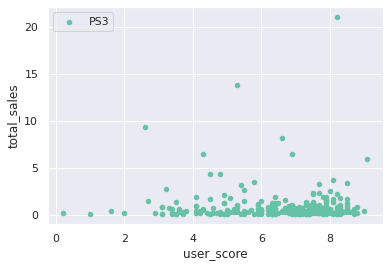

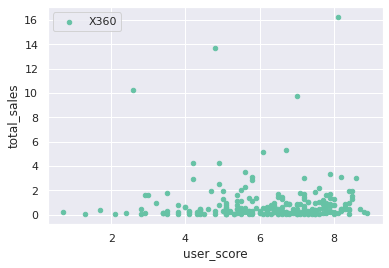

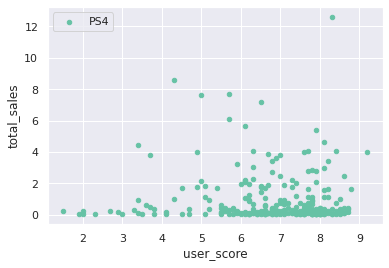

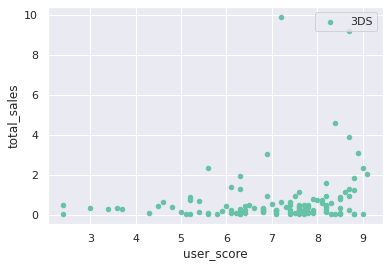

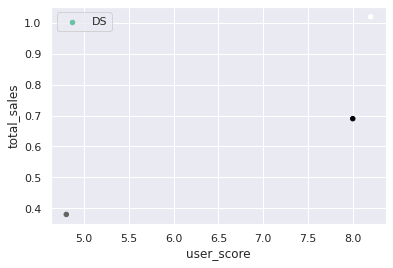

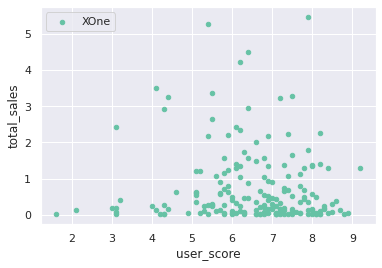

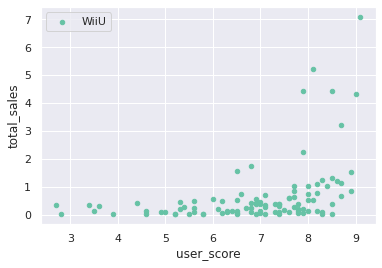

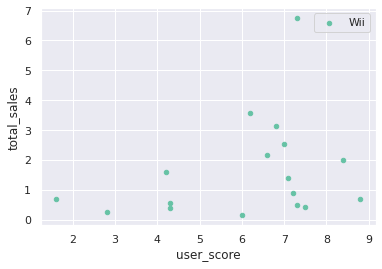

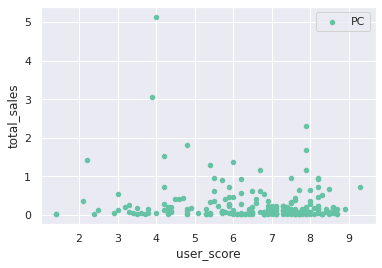

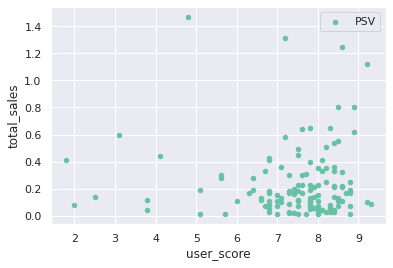

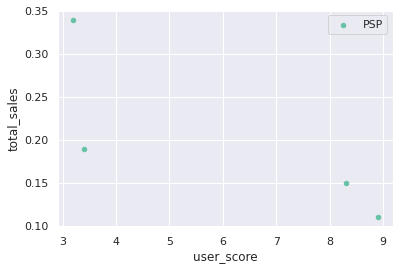

In [37]:
platforms = games_period['platform'].unique()
for platform in platforms:
    temp = games_period[(games_period['platform'] == platform) & (games_period['user_score'] > 0)].copy()
    temp.plot(x='user_score', y='total_sales', grid=True, kind='scatter', label=platform)

**Вывод:** Данные по корреляции между выручкой и оценкой по платформам **WiiU, X360, PS3, 3DS, PS4 и XOne** более или менее совпадает с общими данными по датафрейму.
Выделяются **Wii,DS,PC, PSV и PSP**, по которым зависимость не такая большая.
Кстати, есть платформы, где оценка критиков, согласно данных, сильнее "определяет" конечную выручку продукта, чем оценка пользователей. Это платформы **DS, PS4 и Xone**. В случае с **DS** полагаю, что дело в том, что приставка азиатская, большую популярность она имеет там, соответственно, далеко не большая часть игроков принимает участие в оценке игр на эту платформу. Про **PS4 и Xone** - платформы довольно новые, вполне вероятно, что пользователи пока не "освоились", поэтому большого количества отзывов, особенно качественных от них нет.

### Посмотрим на общее распределение игр по жанрам.

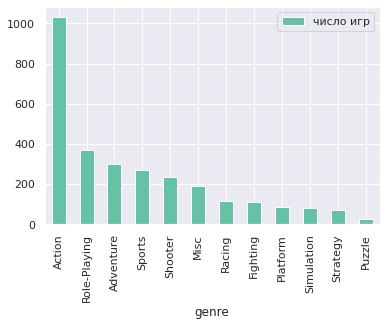

In [38]:
games_period.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', label='число игр', legend=True)
plt.show()

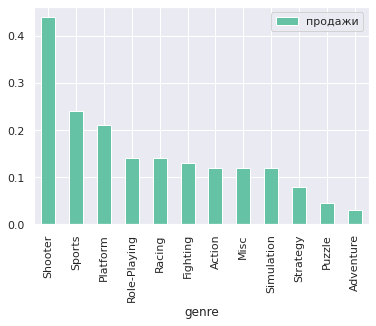

In [39]:
games_period.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', label='продажи', legend=True)
plt.show()

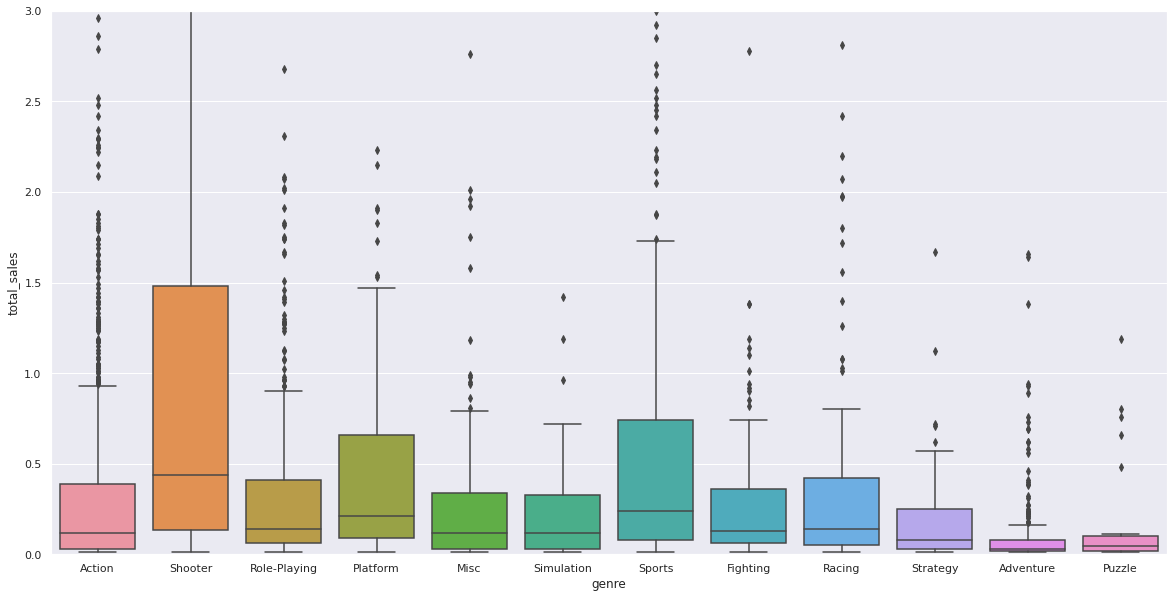

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data=games_period, x='genre', y='total_sales')
plt.ylim(0,3)
plt.show()

**Вывод:** график продаж отличается от графика количества игр, так например на гарфике продаж лидируют:  
- Shoooter
- Sports
- Platform  

А на графике числа игр: 

- Action
- Role-Playing
- Adventure

**Это говорит о том, что нет прямой зависимости между количеством игр и продажами.**

### **Вывод:**
- В результате исследований определили актуальный для нас период (2012-2016гг), также определили продолжительность жизни платформ(10 лет).
- Определили 5 самых прибыльных платформ в актуальном периоде и самые продаваемые игры.
- Рассмотрели корреляцию между продажами и оценками критиков и пользователей.
- Определили самые популярные жанры игр по количесту и продажам.

## Составление портрета пользователя для каждого региона

**Самые популярные платформы (топ-5).**

<AxesSubplot:xlabel='platform'>

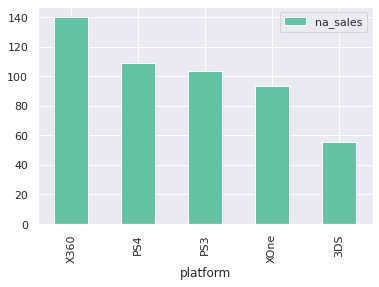

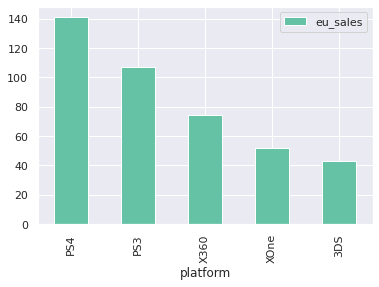

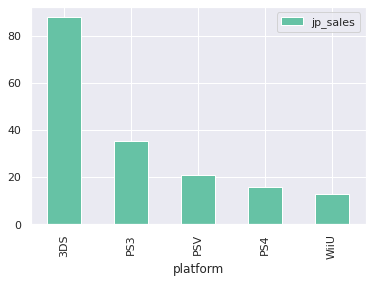

In [41]:
games_period.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games_period.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games_period.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

**Вывод:** Если в Европе и Америке платформы по популярности практически идентичны, то Япония явно выделяется своей платформой DS на 1 месте.

**Самые популярные жанры (топ-5)**

<AxesSubplot:xlabel='genre'>

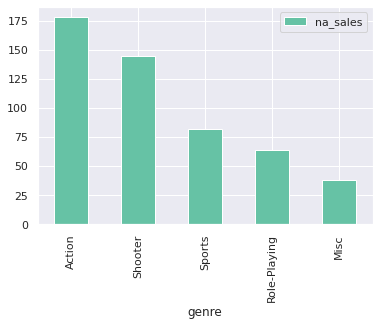

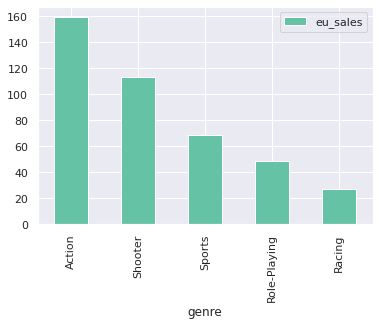

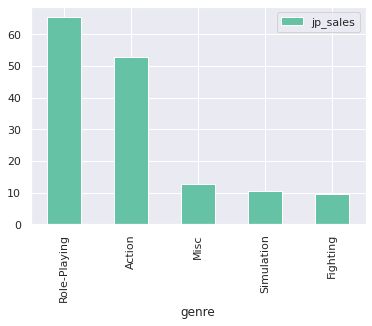

In [42]:
games_period.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games_period.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games_period.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

**Вывод:** Если в Европе и Америке жанры по популярности практически идентичны, то Япония явно выделяется своим жанром Role_Playing на 1 месте.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

<AxesSubplot:xlabel='rating'>

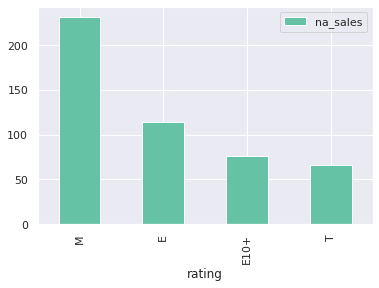

In [43]:
games_with_rating = games_period.loc[games_period['rating'] != 'out of rating']
games_with_rating.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='rating'>

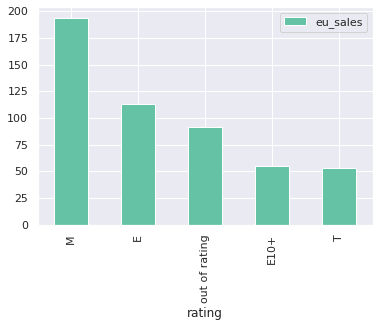

In [44]:
games_period.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='rating'>

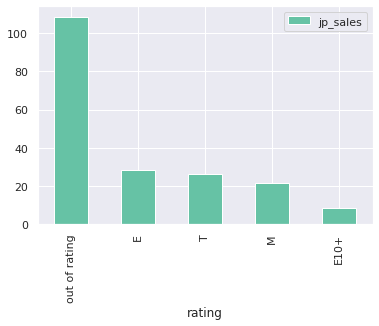

In [45]:
games_period.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

**Вывод:** Первое место во всех регионах занимают игры без ограничений по возрасту('E'), третье и четвертое место делять игры для подростков('T') и для взрослых('M'). Следует отметить, что в Европе более популярны игры для взрослых, чем для подростков. Что касаемо 'out_of rating', то в Европе данная категория занимает 3 место, а в Японии 1 место.

## Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотезы:  

- H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый (нулевая гипотеза)
- H1: средний пользовательский рейтинг платформ Xbox One и PC различается (альтернативная гипотеза)

In [46]:
alpha = 0.05

XOne = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
PC = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

print(XOne.var(ddof=1))
print(PC.var(ddof=1))

1.9069968429360695
2.349224375076853


In [47]:
results = st.ttest_ind(XOne, PC, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


Гипотезы:  

- H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
- H1: средний пользовательский рейтинг жанров Action и Sports различается

In [48]:
alpha = 0.05

Action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
Sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

print(XOne.var(ddof=1))
print(PC.var(ddof=1))

1.9069968429360695
2.349224375076853


In [49]:
results = st.ttest_ind(Action, Sports, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Проверено две гипотезы. И вот какие выводы можно сделать: средние пользовательские рейтинги жанров **Action** и **Sports** близки по значению, а на платформах **Xbox One** и **PC** различаются.

## Общий вывод:

Для расчетов рекламной кампании на 2017 год, необходимо брать в расчет данные **с 2012 года по 2016 год** и учитывать предложения пользователей в регионах, особенно в Японии, в которой большую роль отдают **Role-Playing** играм и платформе **DS**. Что касаемо Европы, то там необходимо сосредоточится на играх в жанре **Shooter, Action и Sports,** а платформе **PS3**, а в Северной Америке также жанрам **Shooter, Action и Sports**, но платформе **Xbox One.**    
По числу игр лидирует жанр - **Action**  
А по продажам - **Shooter**  
Лидерами продаж в регионах являются игры с одинаковыми рейтингами, чем доступнее широким массам рейтинг тем более продаваема игра наиболее продаваемые игры рейтингов **«E» («Everyone») — «Для всех» «T» («Teen») — «Подросткам» «M» («Mature») — «Для взрослых».**